In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 1. Load the dataset into python environment



In [2]:
data=pd.read_csv('/content/titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


4. Fill in all the missing values present in all the columns in the dataset

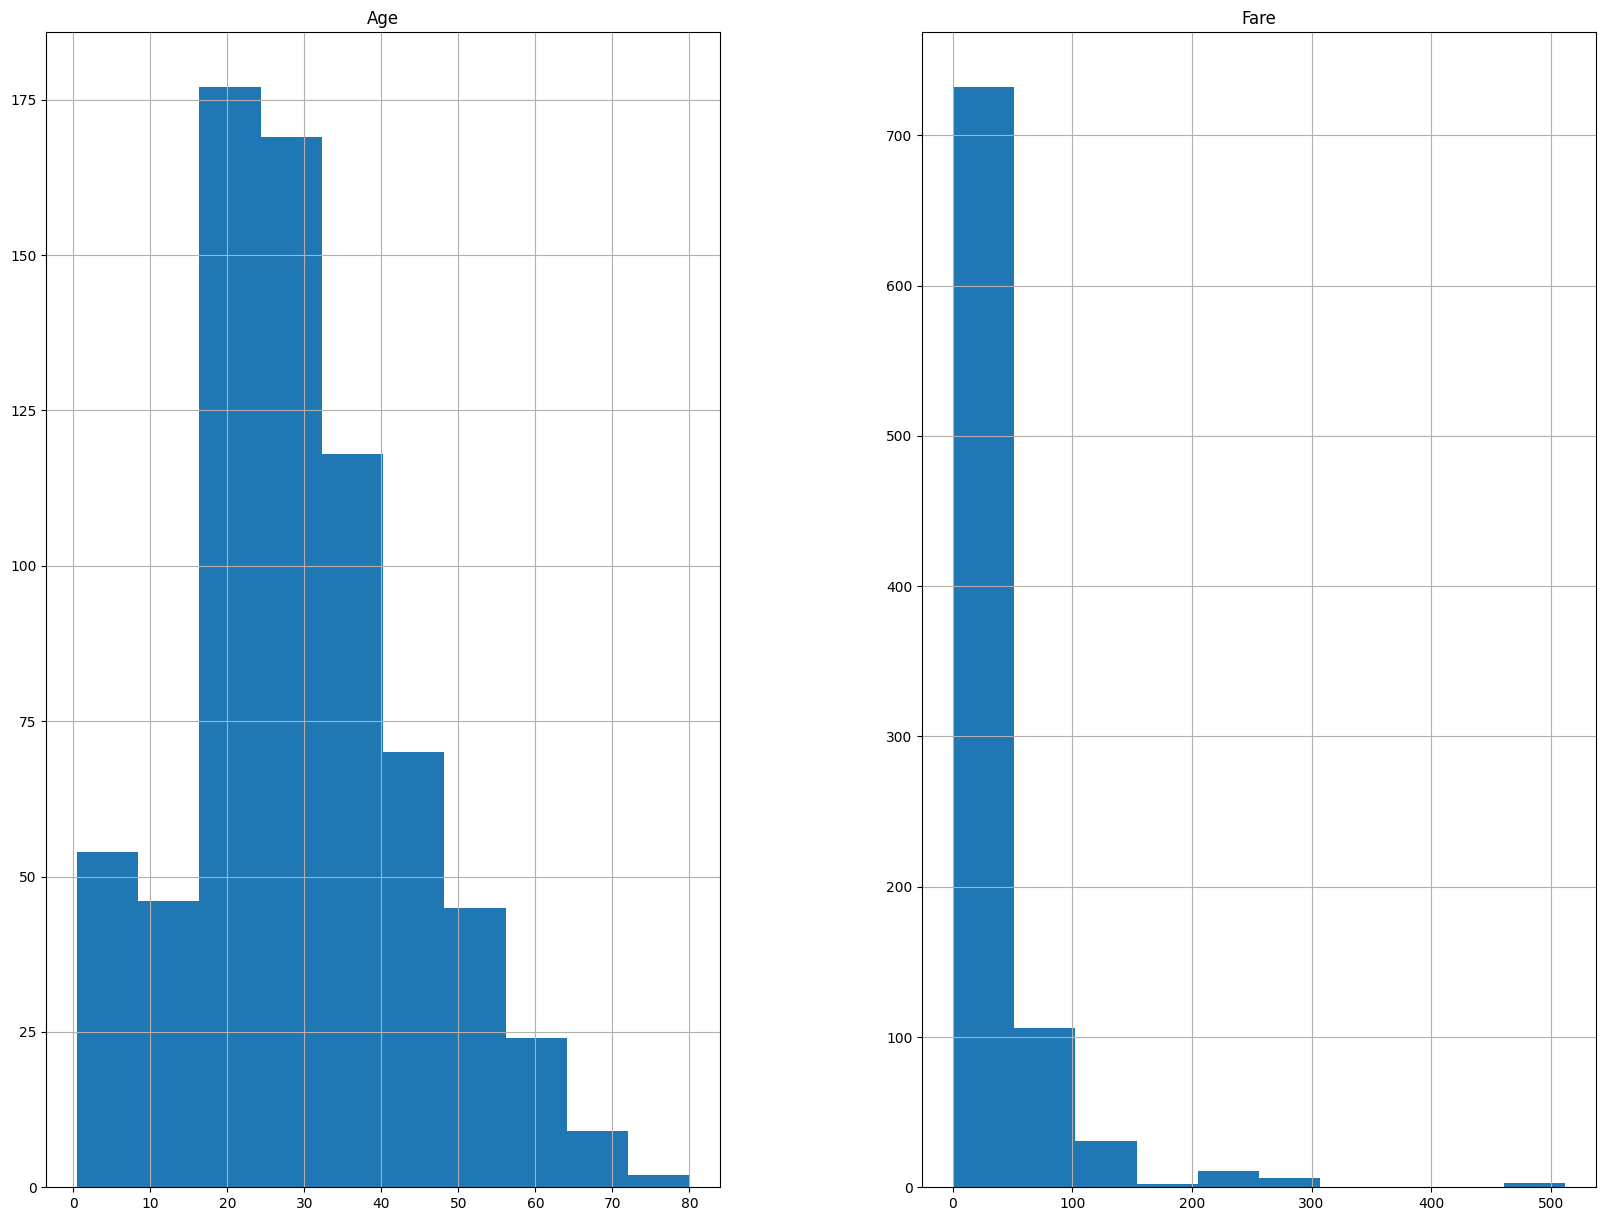

In [5]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

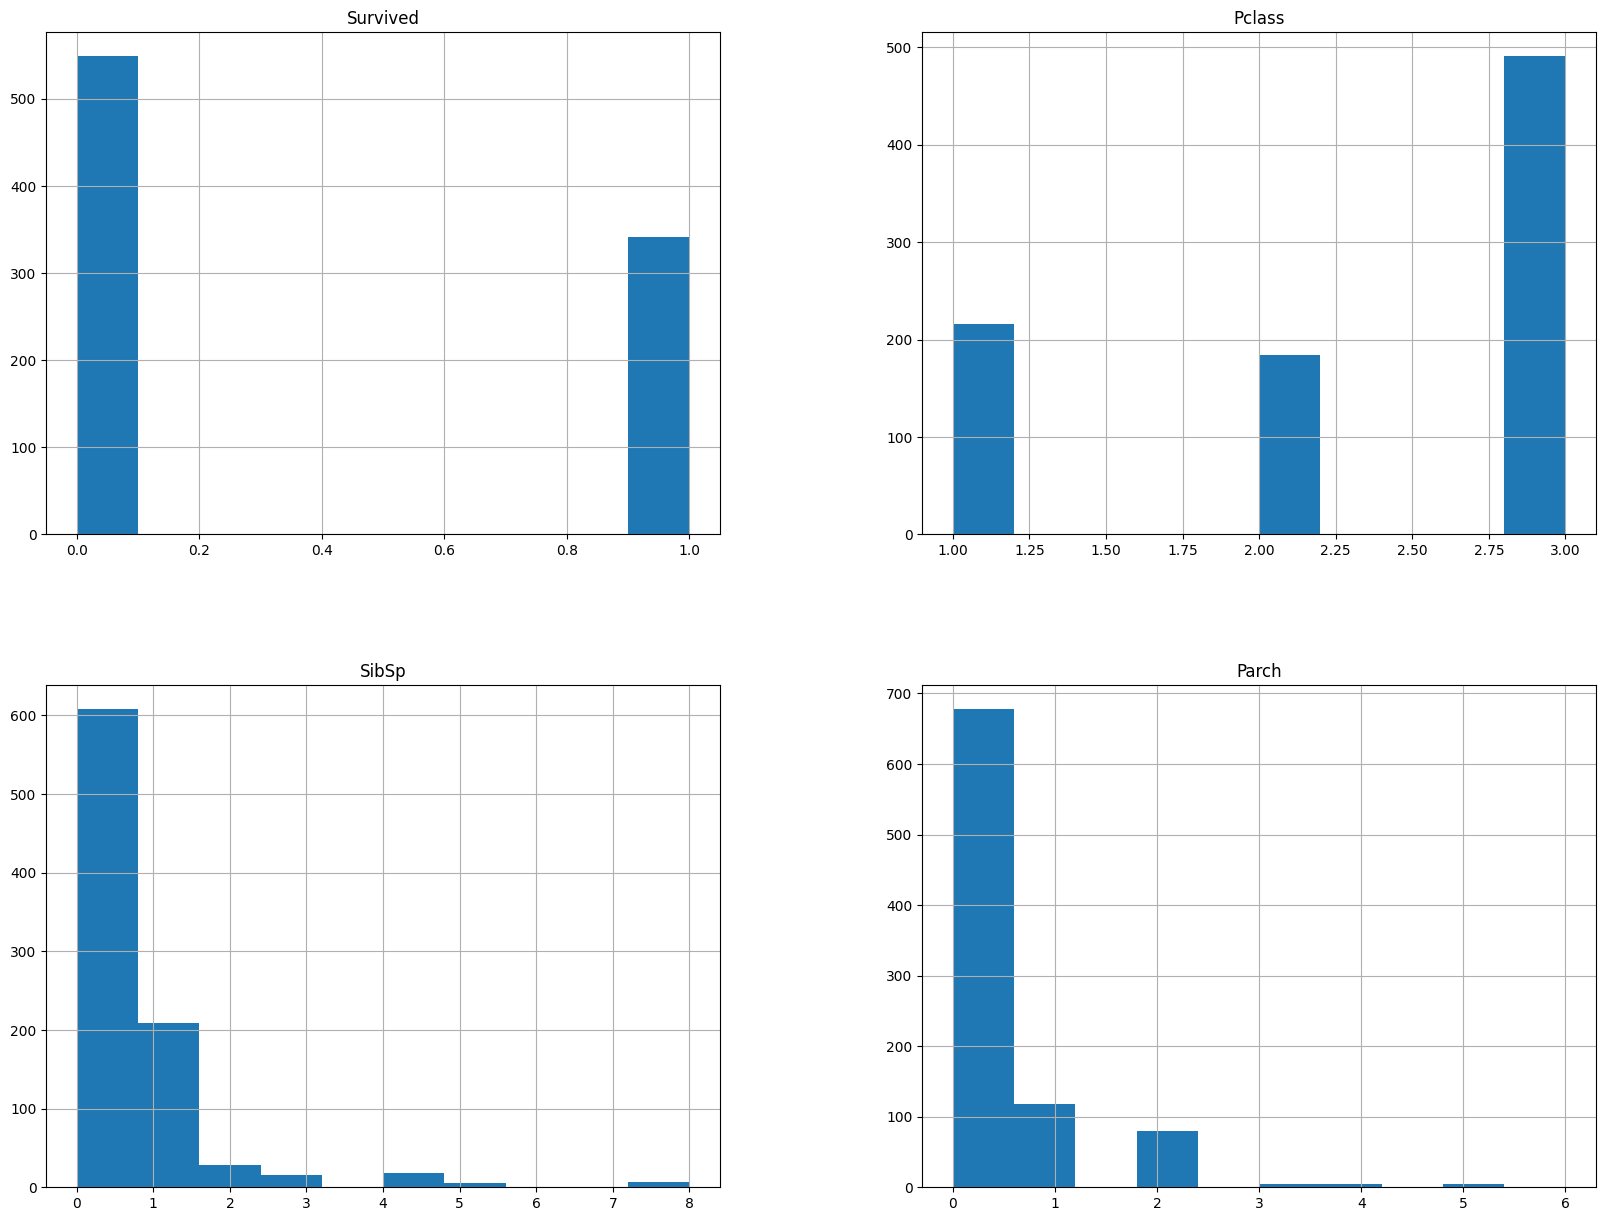

In [6]:
freqgraph = data.select_dtypes(include='int64')
freqgraph.hist(figsize=(20,15));

Data Filling

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


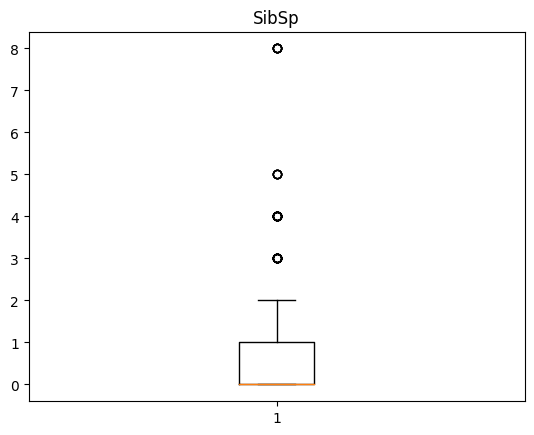

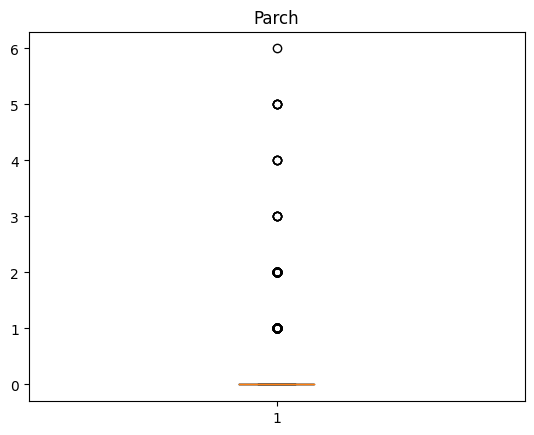

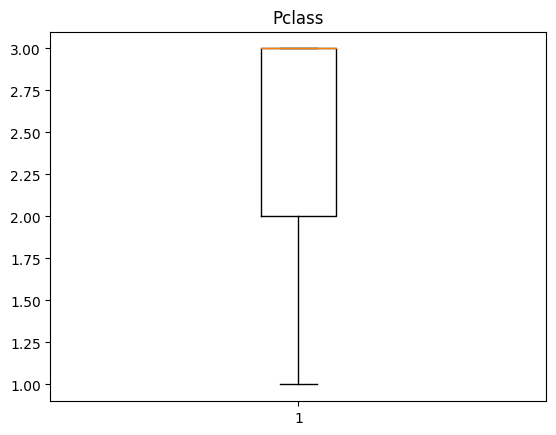

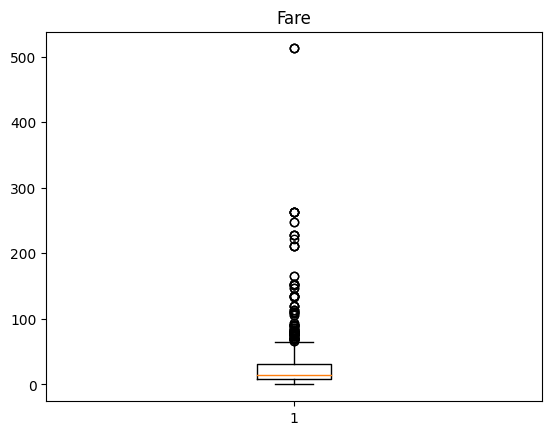

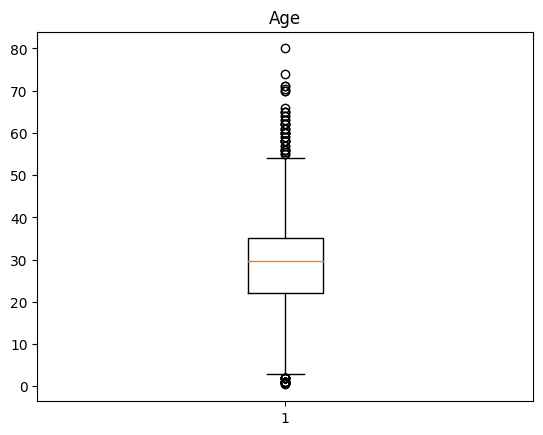

In [11]:
#checking for outlier in independent variables
num_columns =['SibSp', 'Parch','Pclass','Fare','Age']


for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i);

In [12]:
# Handling Outlier for column Sibsp
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  0.0
Q2 is:  0.0
Q3 is:  1.0


In [13]:
IQR = Q3-Q1
print(IQR)

1.0


In [14]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)

lower whisker:  -1.5
upper whisker:  2.5


In [15]:
outlier =[]
for x in data['SibSp']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [16]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim,upper=up_lim)


In [17]:
outlier =[]
for x in data['SibSp']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[]


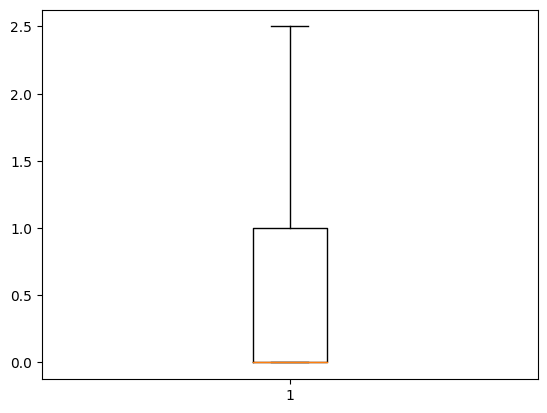

In [18]:
plt.boxplot(data['SibSp'])
plt.show();

In [19]:
# for column Fare
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  7.9104
Q2 is:  14.4542
Q3 is:  31.0


In [20]:
IQR = Q3-Q1
print(IQR)

23.0896


In [21]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)

lower whisker:  -26.724
upper whisker:  65.6344


In [22]:
outlier =[]
for x in data['Fare']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [23]:
data['Fare'] = data['Fare'].clip(lower=low_lim,upper=up_lim)


In [24]:
outlier =[]
for x in data['Fare']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[]


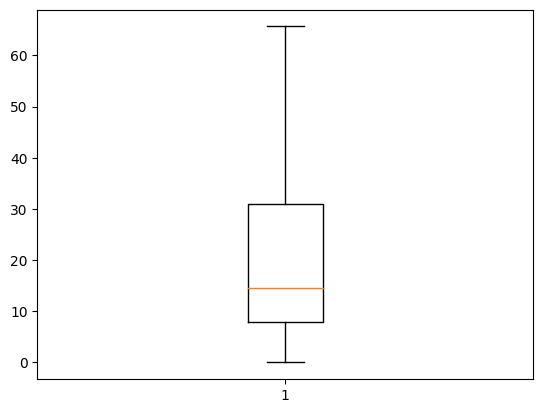

In [25]:
plt.boxplot(data['Fare'])
plt.show();

In [26]:
# for column Age
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

Q1 is:  22.0
Q2 is:  29.69911764705882
Q3 is:  35.0


In [27]:
IQR = Q3-Q1
print(IQR)

13.0


In [28]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)

lower whisker:  2.5
upper whisker:  54.5


In [29]:
outlier =[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [30]:
data['Age'] = data['Age'].clip(lower=low_lim,upper=up_lim)


In [31]:
outlier =[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[]


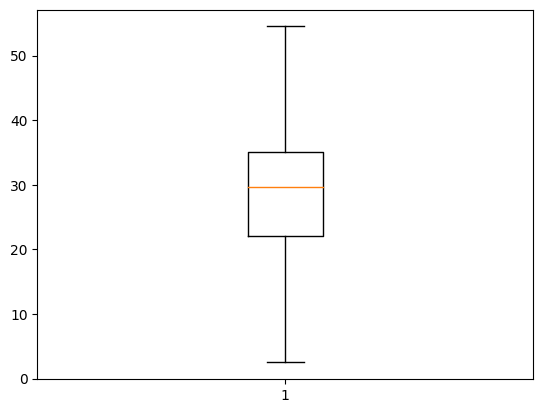

In [32]:
plt.boxplot(data['Age'])
plt.show();

Correlation

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


In [34]:
X=data.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [35]:
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1.0,0,7.2500
2,1,1,38.0,1.0,0,65.6344
3,1,3,26.0,0.0,0,7.9250
4,1,1,35.0,1.0,0,53.1000
5,0,3,35.0,0.0,0,8.0500


In [36]:
X.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.065857,0.031434,0.081629,0.317430
Pclass,-0.338481,1.000000,-0.330962,0.023180,0.018443,-0.715300
Age,-0.065857,-0.330962,1.000000,-0.251585,-0.186087,0.137498
SibSp,0.031434,0.023180,-0.251585,1.000000,0.409366,0.349615
Parch,0.081629,0.018443,-0.186087,0.409366,1.000000,0.292616
Fare,0.317430,-0.715300,0.137498,0.349615,0.292616,1.000000


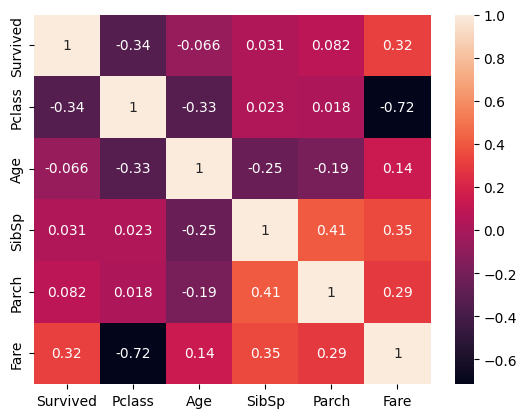

In [37]:
sns.heatmap(X.corr(),annot=True)
plt.show()

Data Encoding

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


In [39]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [40]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [41]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [42]:
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [43]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le= LabelEncoder()

In [47]:
#Label Encoding for Name,Ticket,Cabin
data['Name']=le.fit_transform(data['Name'])
data['Ticket']=le.fit_transform(data['Ticket'])
data['Cabin']=le.fit_transform(data['Cabin'])

In [48]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,male,22.0,1.0,0,523,7.2500,47,S
2,1,1,190,female,38.0,1.0,0,596,65.6344,81,C
3,1,3,353,female,26.0,0.0,0,669,7.9250,47,S
4,1,1,272,female,35.0,1.0,0,49,53.1000,55,S
5,0,3,15,male,35.0,0.0,0,472,8.0500,47,S


One Hot Encoding

In [49]:
#One hot encoding for Sex,Embarked
data=pd.get_dummies(data)

In [50]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,108,22.0,1.0,0,523,7.2500,47,0,1,0,0,1
2,1,1,190,38.0,1.0,0,596,65.6344,81,1,0,1,0,0
3,1,3,353,26.0,0.0,0,669,7.9250,47,1,0,0,0,1
4,1,1,272,35.0,1.0,0,49,53.1000,55,1,0,0,0,1
5,0,3,15,35.0,0.0,0,472,8.0500,47,0,1,0,0,1


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    int64  
 6   Ticket      891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Cabin       891 non-null    int64  
 9   Sex_female  891 non-null    uint8  
 10  Sex_male    891 non-null    uint8  
 11  Embarked_C  891 non-null    uint8  
 12  Embarked_Q  891 non-null    uint8  
 13  Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 74.0 KB


In [52]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [53]:
#droping all the columns other than independant variables
X=data.drop(['Survived','Name','Ticket','Cabin','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'],axis=1)

In [54]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1.0,0,7.2500
2,1,38.000000,1.0,0,65.6344
3,3,26.000000,0.0,0,7.9250
4,1,35.000000,1.0,0,53.1000
5,3,35.000000,0.0,0,8.0500
...,...,...,...,...,...
887,2,27.000000,0.0,0,13.0000
888,1,19.000000,0.0,0,30.0000
889,3,29.699118,1.0,2,23.4500


In [55]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.376817,0.426487,0.381594,24.046813
std,0.836071,12.062035,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


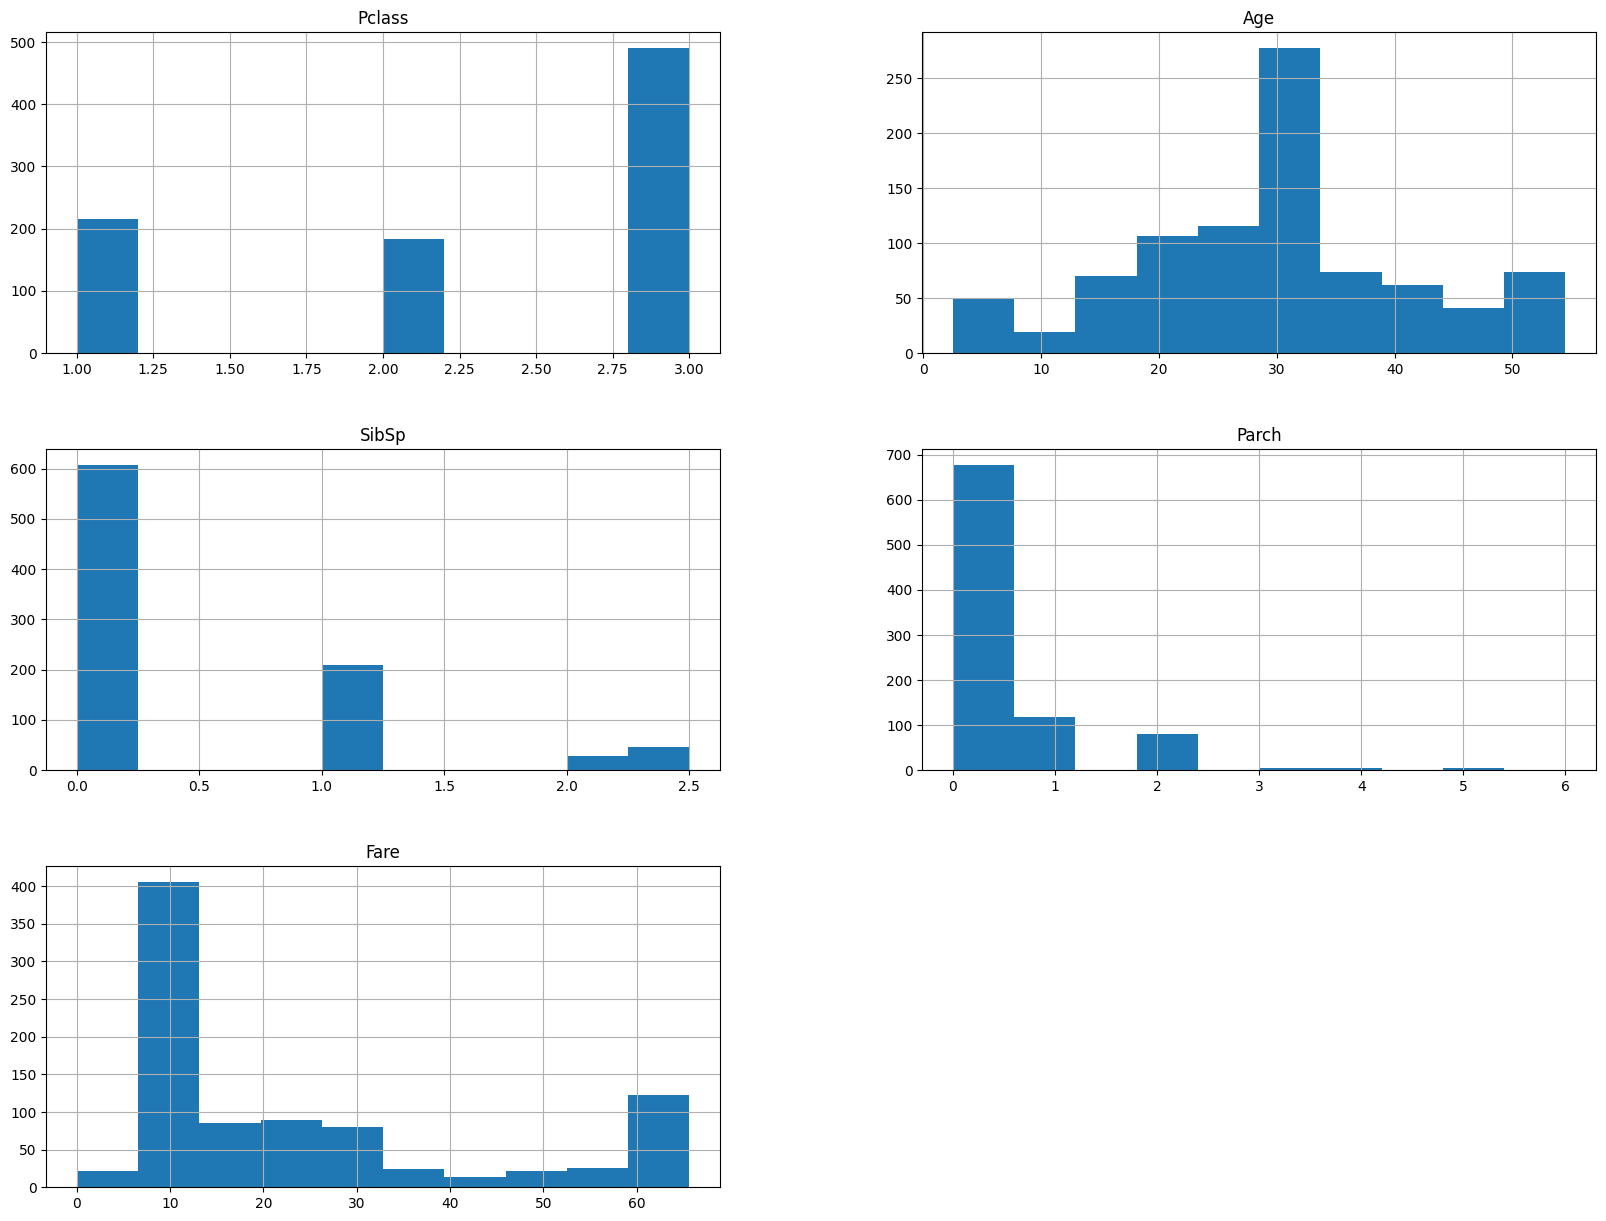

In [56]:
X.hist(figsize=(20,15))
plt.show()

Min Max Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

In [58]:
X_mm=minmax.fit_transform(X)

In [59]:
X_mm=pd.DataFrame(X_mm)

In [60]:
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.516862,0.170595,0.063599,0.366375
std,0.418036,0.231962,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.523060,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


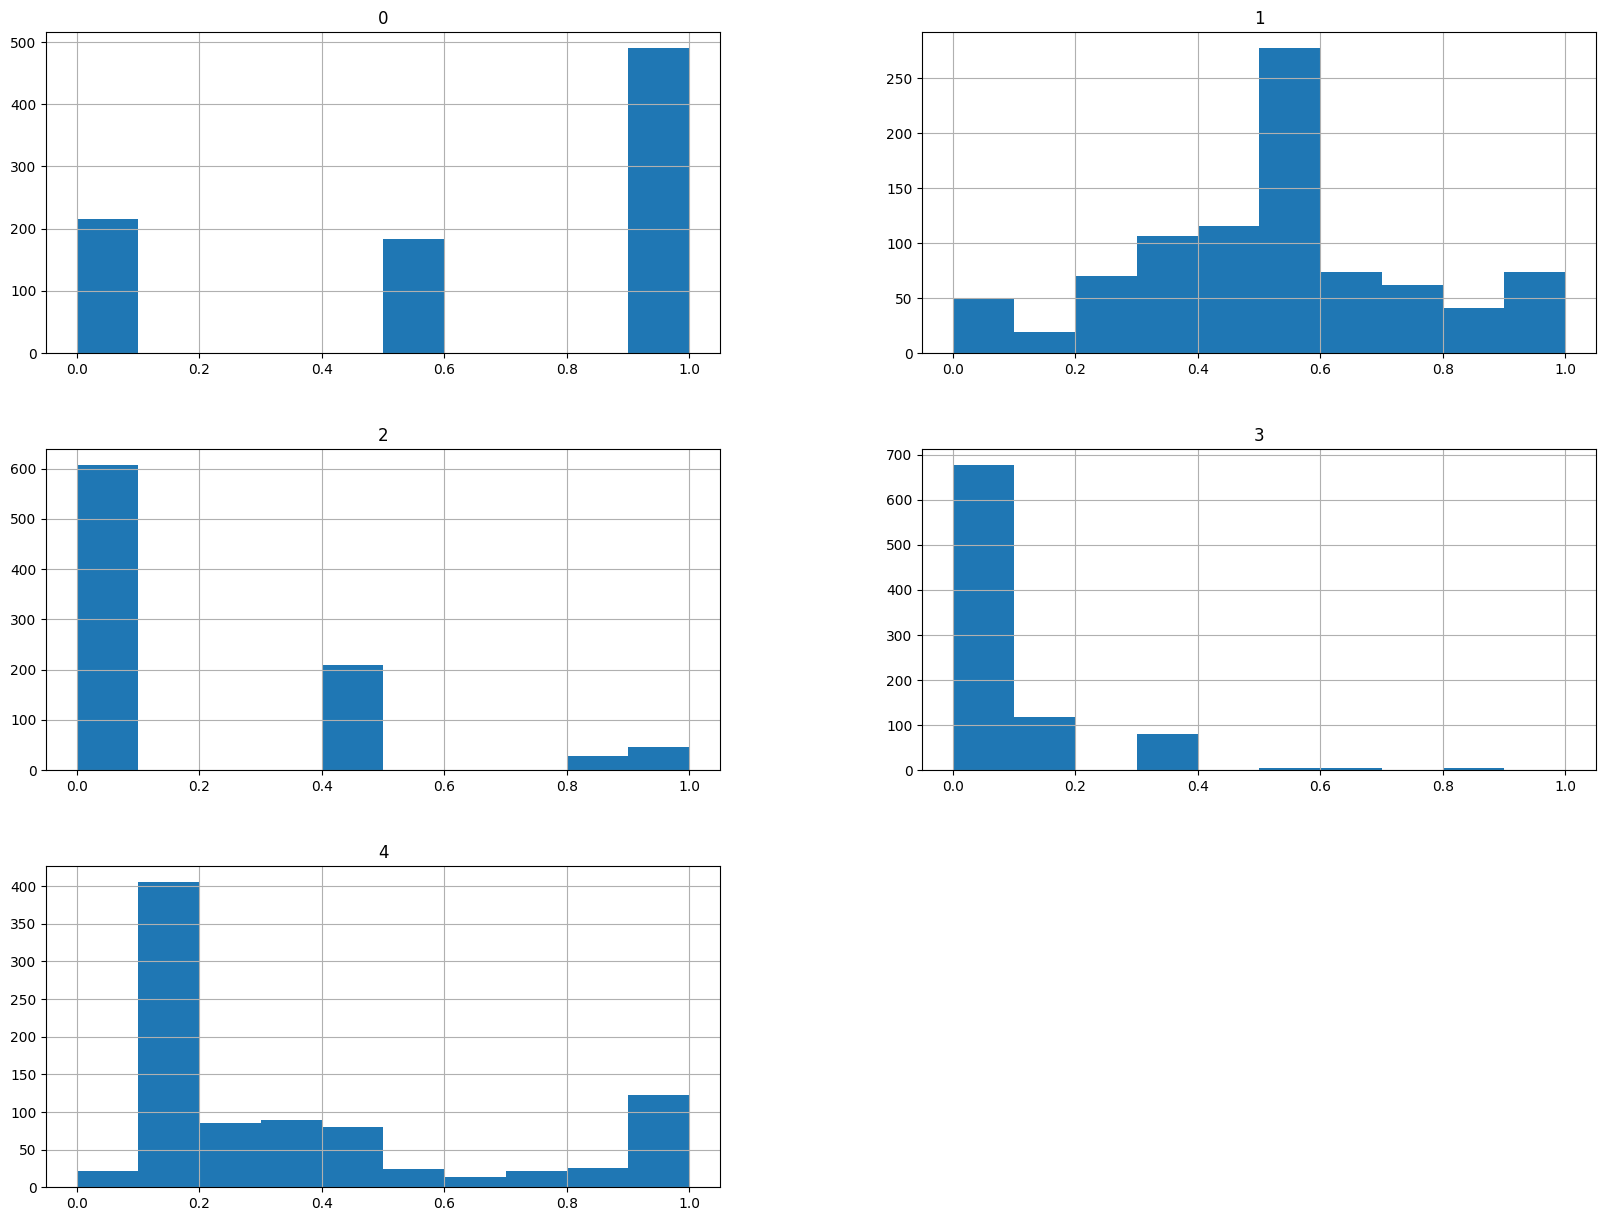

In [61]:
X_mm.hist(figsize=(20,15))
plt.show();